In [1]:
!pip install opencv-python opencv-contrib-python numpy

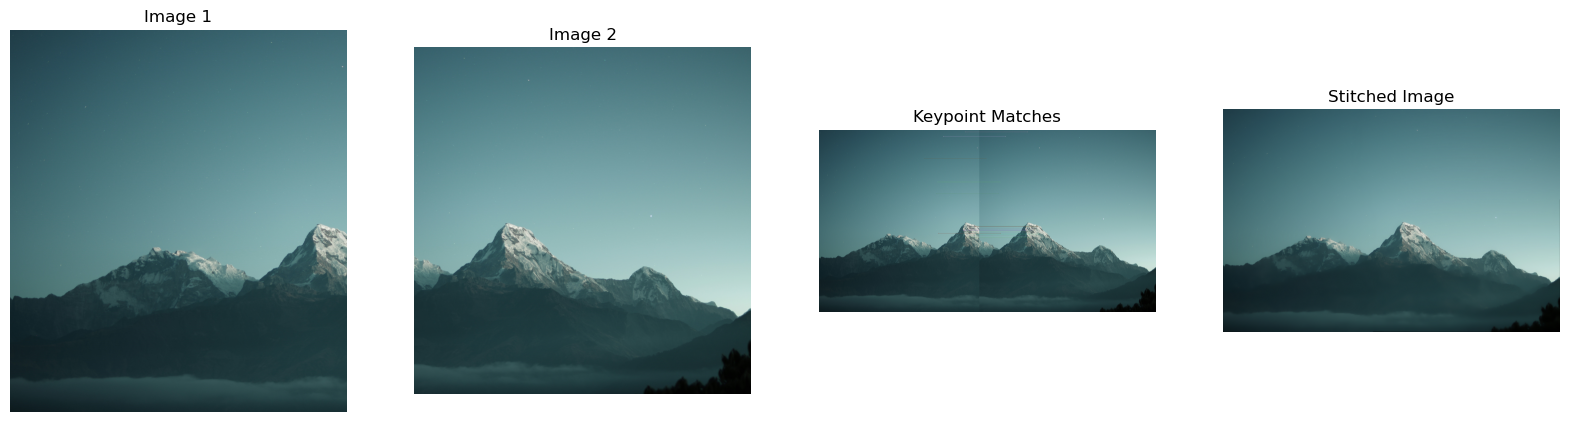

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread("image1.jpg")
img2 = cv2.imread("image2.jpg")

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create()

keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:20], None, 
                              flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

stitcher = cv2.Stitcher_create()  # Use Stitcher_create instead of createStitcher
status, stitched_image = stitcher.stitch([img1, img2])

if status == cv2.Stitcher_OK:
    plt.figure(figsize=(20, 10))
    
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title('Image 1')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title('Image 2')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
    plt.title('Keypoint Matches')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(stitched_image, cv2.COLOR_BGR2RGB))
    plt.title('Stitched Image')
    plt.axis('off')

    plt.show()
    cv2.imwrite('stitched_image.jpg', stitched_image)
    #files.download('stitched_image.jpg') # Uncomment if using Colab
else:
    print("Stitching failed with status:", status)
